

---



---


#**PARKINSON'S DISEASE DETECTION USING DEEP LEARNING MODELS:**

---



---



# **What is Parkinson's Disease?**

Parkinson's disease (PD), or simply Parkinson's is a long-term degenerative disorder of the central nervous system that mainly affects the motor system. The symptoms usually emerge slowly and, as the disease worsens, non-motor symptoms become more common. The most obvious early symptoms are tremor, rigidity, slowness of movement, and difficulty with walking,but cognitive and behavioral problems may also occur. Parkinson's disease dementia becomes common in the advanced stages of the disease. Depression and anxiety are also common, occurring in more than a third of people with PD. Other symptoms include sensory, sleep, and emotional problems. The main motor symptoms are collectively called "parkinsonism", or a "parkinsonian syndrome.

**PACKAGES AND LIBRARIES**

In [114]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D
from keras import models
from keras import layers
import tensorflow as tf
#from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model

#from sklearn.linear_model import Ridge
#from sklearn.linear_model import RidgeCV
#from sklearn.linear_model import Lasso
#from sklearn.linear_model import LassoCV
#from sklearn.linear_model import ElasticNet
#from sklearn.linear_model import ElasticNetCV

#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# **DATASET**

Images of healthy and patients with Parkinsons drawing spirals and waves. The images are further divided into training and testing groups for comparing 



The dataset itself consists of images and is pre-split into a training set and a testing set, consisting of:

Spiral: training, and testing

Wave: training, and testing

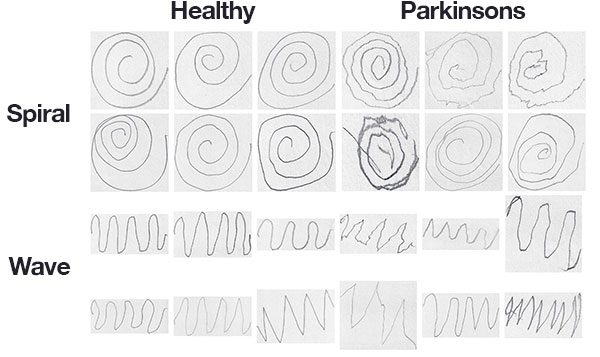

# DATASET PATH & LABELS

#### TRAIN-TEST PATH

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
Spiral_Train_Path = Path("/content/drive/MyDrive/parkinsons-drawings/spiral/training")
Spiral_Test_Path = Path("/content/drive/MyDrive/parkinsons-drawings/spiral/testing")

In [117]:
Spiral_Train_PNG_Path = list(Spiral_Train_Path.glob(r"*/*.png"))
Spiral_Test_PNG_Path = list(Spiral_Test_Path.glob(r"*/*.png"))

#### LABELS

In [118]:
Spiral_Train_PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Spiral_Train_PNG_Path))
Spiral_Test_PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Spiral_Test_PNG_Path))

# TRANSFORMATION TO SERIES STRUCTURE

#### SPIRAL

In [119]:
Spiral_Train_PNG_Path_Series = pd.Series(Spiral_Train_PNG_Path,name="PNG").astype(str)
Spiral_Train_PNG_Labels_Series = pd.Series(Spiral_Train_PNG_Labels,name="CATEGORY")

In [120]:
Spiral_Test_PNG_Path_Series = pd.Series(Spiral_Test_PNG_Path,name="PNG").astype(str)
Spiral_Test_PNG_Labels_Series = pd.Series(Spiral_Test_PNG_Labels,name="CATEGORY")

# TRANSFORMATION TO DATAFRAME STRUCTURE

#### SPIRAL

In [121]:
Main_Spiral_Train_Data = pd.concat([Spiral_Train_PNG_Path_Series,Spiral_Train_PNG_Labels_Series],axis=1)

In [122]:
print(Main_Spiral_Train_Data.head(-1))

                                                  PNG   CATEGORY
0   /content/drive/MyDrive/parkinsons-drawings/spi...    healthy
1   /content/drive/MyDrive/parkinsons-drawings/spi...    healthy
2   /content/drive/MyDrive/parkinsons-drawings/spi...    healthy
3   /content/drive/MyDrive/parkinsons-drawings/spi...    healthy
4   /content/drive/MyDrive/parkinsons-drawings/spi...    healthy
..                                                ...        ...
66  /content/drive/MyDrive/parkinsons-drawings/spi...  parkinson
67  /content/drive/MyDrive/parkinsons-drawings/spi...  parkinson
68  /content/drive/MyDrive/parkinsons-drawings/spi...  parkinson
69  /content/drive/MyDrive/parkinsons-drawings/spi...  parkinson
70  /content/drive/MyDrive/parkinsons-drawings/spi...  parkinson

[71 rows x 2 columns]


In [123]:
Main_Spiral_Test_Data = pd.concat([Spiral_Test_PNG_Path_Series,Spiral_Test_PNG_Labels_Series],axis=1)

In [124]:
print(Main_Spiral_Test_Data.head(-1))

                                                  PNG   CATEGORY
0   /content/drive/MyDrive/parkinsons-drawings/spi...    healthy
1   /content/drive/MyDrive/parkinsons-drawings/spi...    healthy
2   /content/drive/MyDrive/parkinsons-drawings/spi...    healthy
3   /content/drive/MyDrive/parkinsons-drawings/spi...    healthy
4   /content/drive/MyDrive/parkinsons-drawings/spi...    healthy
5   /content/drive/MyDrive/parkinsons-drawings/spi...    healthy
6   /content/drive/MyDrive/parkinsons-drawings/spi...    healthy
7   /content/drive/MyDrive/parkinsons-drawings/spi...    healthy
8   /content/drive/MyDrive/parkinsons-drawings/spi...    healthy
9   /content/drive/MyDrive/parkinsons-drawings/spi...    healthy
10  /content/drive/MyDrive/parkinsons-drawings/spi...    healthy
11  /content/drive/MyDrive/parkinsons-drawings/spi...    healthy
12  /content/drive/MyDrive/parkinsons-drawings/spi...    healthy
13  /content/drive/MyDrive/parkinsons-drawings/spi...    healthy
14  /content/drive/MyDriv

# SHUFFLING

In [125]:
Main_Spiral_Train_Data = Main_Spiral_Train_Data.sample(frac=1).reset_index(drop=True)
Main_Spiral_Test_Data = Main_Spiral_Test_Data.sample(frac=1).reset_index(drop=True)

In [126]:
print(Main_Spiral_Train_Data.head(-1))
print("---"*20)
print(Main_Spiral_Test_Data.head(-1))

                                                  PNG   CATEGORY
0   /content/drive/MyDrive/parkinsons-drawings/spi...    healthy
1   /content/drive/MyDrive/parkinsons-drawings/spi...    healthy
2   /content/drive/MyDrive/parkinsons-drawings/spi...    healthy
3   /content/drive/MyDrive/parkinsons-drawings/spi...  parkinson
4   /content/drive/MyDrive/parkinsons-drawings/spi...    healthy
..                                                ...        ...
66  /content/drive/MyDrive/parkinsons-drawings/spi...  parkinson
67  /content/drive/MyDrive/parkinsons-drawings/spi...  parkinson
68  /content/drive/MyDrive/parkinsons-drawings/spi...  parkinson
69  /content/drive/MyDrive/parkinsons-drawings/spi...  parkinson
70  /content/drive/MyDrive/parkinsons-drawings/spi...    healthy

[71 rows x 2 columns]
------------------------------------------------------------
                                                  PNG   CATEGORY
0   /content/drive/MyDrive/parkinsons-drawings/spi...    healthy
1   /c

# **DATA VISUALIZATION**

Text(0.5, 1.0, 'healthy')

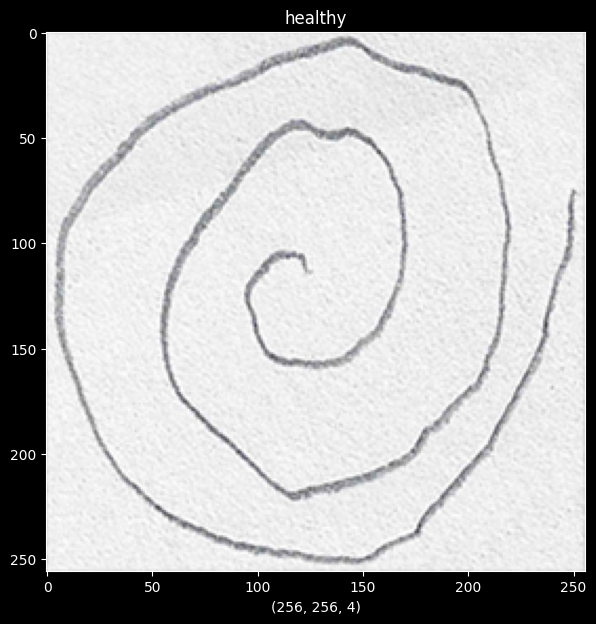

In [127]:
figure = plt.figure(figsize=(7,7))
x = plt.imread(Main_Spiral_Train_Data["PNG"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Spiral_Train_Data["CATEGORY"][0])

Text(0.5, 1.0, 'healthy')

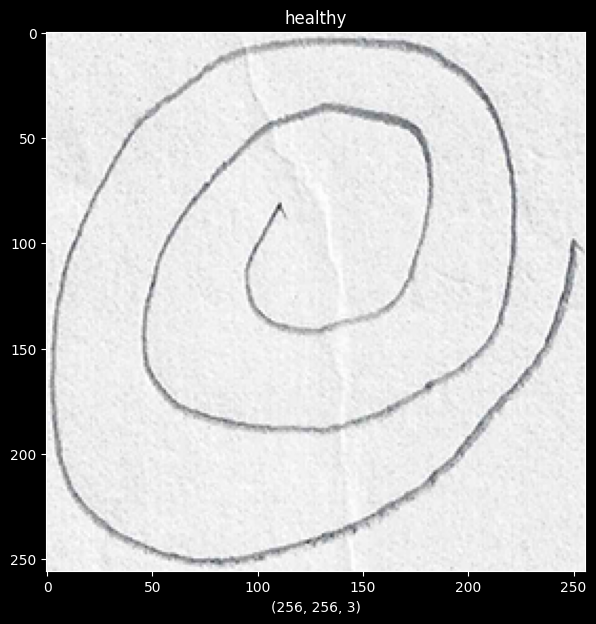

In [128]:
figure = plt.figure(figsize=(7,7))
x = plt.imread(Main_Spiral_Test_Data["PNG"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Spiral_Test_Data["CATEGORY"][0])

**READING 5 ROWS AND 5 COLUMS DATA (Main_Spiral_Train_Data )**

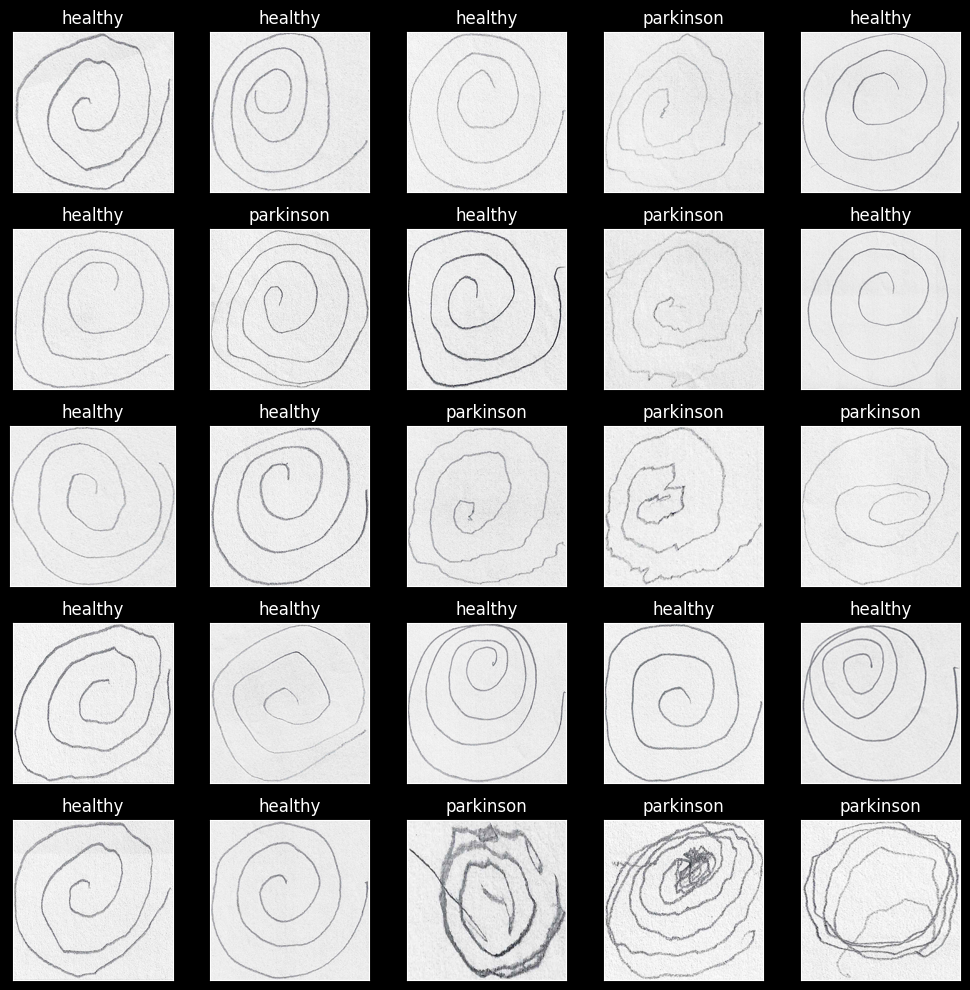

In [129]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Spiral_Train_Data["PNG"][i]))
    ax.set_title(Main_Spiral_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

**READING 5 ROWS AND 5 COLUMS DATA (Main_Spiral_TEST_Data )**

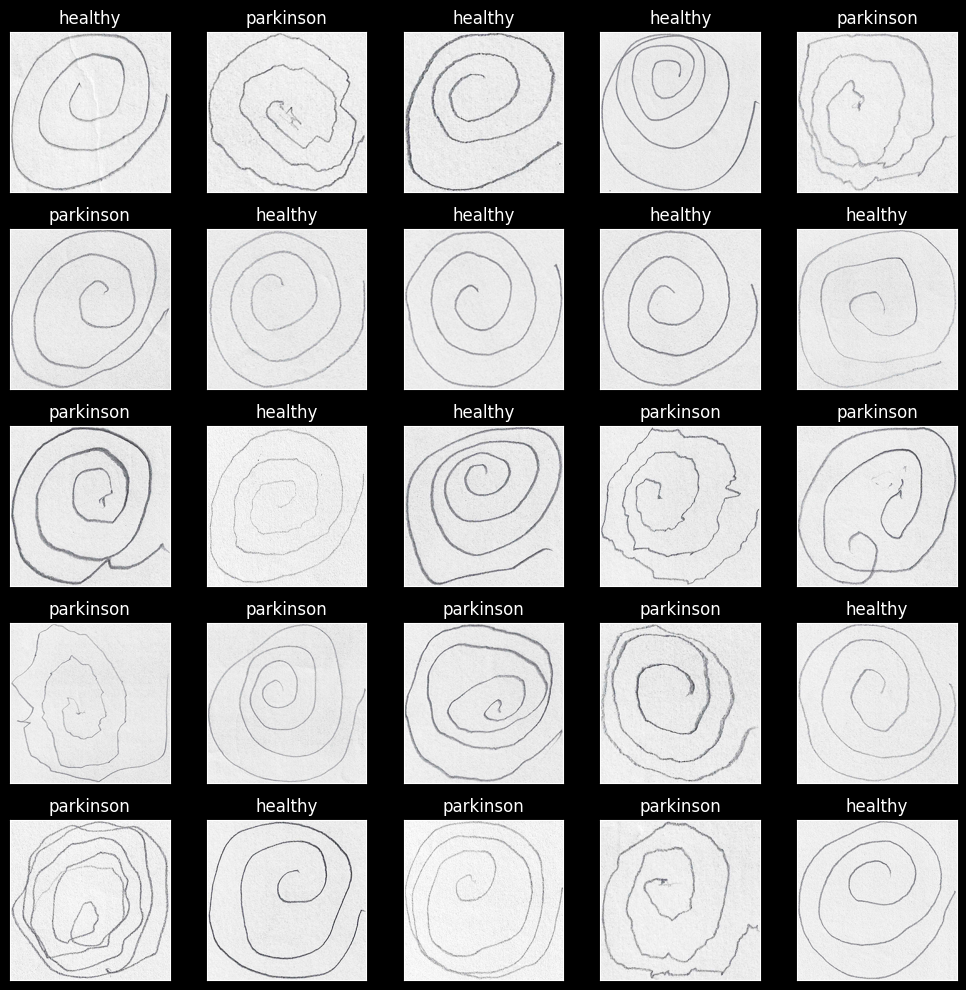

In [130]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Spiral_Test_Data["PNG"][i]))
    ax.set_title(Main_Spiral_Test_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

# IMAGE GENERATOR PROCESS

#### APPLYING GENERATOR

In [131]:
Train_Generator = ImageDataGenerator(rescale=1./255,
                                    zoom_range=0.7,
                                    shear_range=0.7,
                                    rotation_range=50,
                                    horizontal_flip=True,
                                     brightness_range=[0.2,0.9],
                                     vertical_flip=True,
                                    validation_split=0.1)

**TRAIN AND TEST SPIRAL IMAGES**

In [132]:
Train_Spiral_Set = Train_Generator.flow_from_dataframe(dataframe=Main_Spiral_Train_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="grayscale",
                                                   class_mode="categorical",
                                                       subset="training")

Found 65 validated image filenames belonging to 2 classes.


In [133]:
Validation_Spiral_Set = Train_Generator.flow_from_dataframe(dataframe=Main_Spiral_Train_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="grayscale",
                                                   class_mode="categorical",
                                                       subset="validation")

Found 7 validated image filenames belonging to 2 classes.


In [134]:
Test_Spiral_Set = Train_Generator.flow_from_dataframe(dataframe=Main_Spiral_Test_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="grayscale",
                                                   class_mode="categorical")

Found 30 validated image filenames belonging to 2 classes.


In [135]:
print("TRAIN: ")
print(Train_Spiral_Set.class_indices)
print(Train_Spiral_Set.classes[0:5])
print(Train_Spiral_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validation_Spiral_Set.class_indices)
print(Validation_Spiral_Set.classes[0:5])
print(Validation_Spiral_Set.image_shape)
print("---"*20)
print("TEST: ")
print(Test_Spiral_Set.class_indices)
print(Test_Spiral_Set.classes[0:5])
print(Test_Spiral_Set.image_shape)

TRAIN: 
{'healthy': 0, 'parkinson': 1}
[0, 1, 0, 0, 0]
(256, 256, 1)
------------------------------------------------------------
VALIDATION: 
{'healthy': 0, 'parkinson': 1}
[0, 0, 0, 1, 0]
(256, 256, 1)
------------------------------------------------------------
TEST: 
{'healthy': 0, 'parkinson': 1}
[0, 1, 0, 0, 1]
(256, 256, 1)


#### TRANSFORMATION

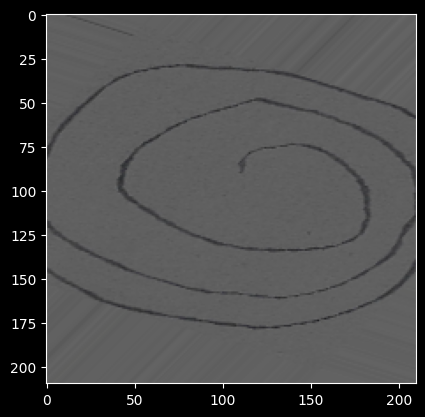

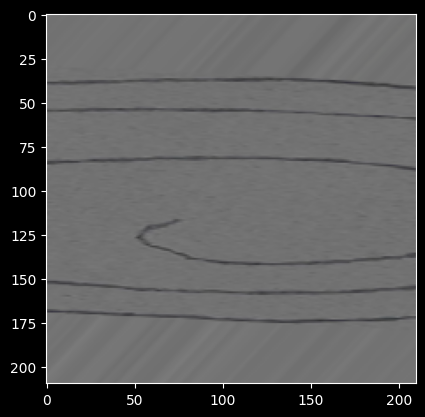

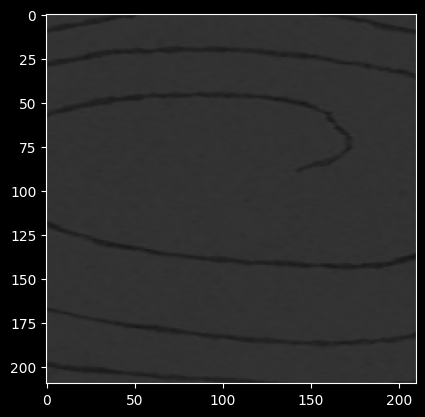

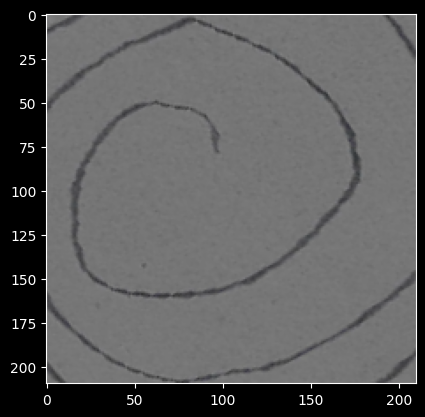

In [136]:
import keras.utils as image
example_Image = Main_Spiral_Train_Data["PNG"][30]
Load_Image = image.load_img(example_Image,target_size=(210,210))
Array_Image = image.img_to_array(Load_Image)
Array_Image = Array_Image.reshape((1,) + Array_Image.shape)
i = 0
for batch in Train_Generator.flow(Array_Image,batch_size=5):
    plt.figure(i)
    Image = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

# **RESNET DEEP LEARNING MODEL DEPLOYMENT**

In [137]:
dir_sp_train = '/content/drive/MyDrive/parkinsons-drawings/spiral/training'
dir_sp_test = '/content/drive/MyDrive/parkinsons-drawings/spiral/testing'
dir_wv_train = '/content/drive/MyDrive/parkinsons-drawings/wave/training'
dir_wv_test = '/content/drive/MyDrive/parkinsons-drawings/wave/testing'

In [138]:
Name=[]
for file in os.listdir(dir_sp_train):
    Name+=[file]
print(Name)
print(len(Name))

['healthy', 'parkinson']
2


In [139]:
N=[]
for i in range(len(Name)):
    N+=[i]
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [140]:
dataset_sp=[]
count=0
for file in os.listdir(dir_sp_train):
    path=os.path.join(dir_sp_train,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
        image=img_to_array(image)
        image=image/255.0
        dataset_sp.append([image,count])
    count=count+1
    
testset_sp=[]
count=0
for file in os.listdir(dir_sp_test):
    path=os.path.join(dir_sp_test,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))

In [141]:
dataset_sp=[]
count=0
for file in os.listdir(dir_sp_train):
    path=os.path.join(dir_sp_train,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
        image=img_to_array(image)
        image=image/255.0
        dataset_sp.append([image,count])
    count=count+1
    
testset_sp=[]
count=0
for file in os.listdir(dir_sp_test):
    path=os.path.join(dir_sp_test,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
        image=img_to_array(image)
        image=image/255.0
        testset_sp.append([image,count])
    count=count+1

In [142]:
dataset_wv=[]
count=0
for file in os.listdir(dir_wv_train):
    path=os.path.join(dir_wv_train,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
        image=img_to_array(image)
        image=image/255.0
        dataset_wv.append([image,count])
    count=count+1
    
testset_wv=[]
count=0
for file in os.listdir(dir_wv_test):
    path=os.path.join(dir_wv_test,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
        image=img_to_array(image)
        image=image/255.0
        testset_wv.append([image,count])
    count=count+1

In [143]:
data_sp,labels_sp0=zip(*dataset_sp)
test_sp,tlabels_sp0=zip(*testset_sp)

data_wv,labels_wv0=zip(*dataset_wv)
test_wv,tlabels_wv0=zip(*testset_wv)

In [144]:
labels_sp1=to_categorical(labels_sp0)
data_sp=np.array(data_sp)
labels_sp=np.array(labels_sp1)

tlabels_sp1=to_categorical(tlabels_sp0)
test_sp=np.array(test_sp)
tlabels_sp=np.array(tlabels_sp1)

In [145]:
labels_wv1=to_categorical(labels_wv0)
data_wv=np.array(data_wv)
labels_wv=np.array(labels_wv1)

tlabels_wv1=to_categorical(tlabels_wv0)
test_wv=np.array(test_wv)
tlabels_wv=np.array(tlabels_wv1)

**SPLIT THE DATA INTO TRAIN AND TEST DATA**

In [146]:
trainx_sp,testx_sp,trainy_sp,testy_sp=train_test_split(data_sp,labels_sp,test_size=0.2,random_state=44)
trainx_wv,testx_wv,trainy_wv,testy_wv=train_test_split(data_wv,labels_wv,test_size=0.2,random_state=44)

In [147]:
print(trainx_sp.shape)
print(testx_sp.shape)
print(trainy_sp.shape)
print(testy_sp.shape)

(57, 100, 100, 3)
(15, 100, 100, 3)
(57, 2)
(15, 2)


In [148]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

**1. MODEL BUILDING**

In [149]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

pretrained_model4 = tf.keras.applications.DenseNet201(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model4.trainable = False

In [150]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(2, activation='softmax')(x3)
model3 = tf.keras.Model(inputs=inputs3, outputs=outputs3)

inputs4 = pretrained_model4.input
x4 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model4.output)
outputs4 = tf.keras.layers.Dense(2, activation='softmax')(x4)
model4 = tf.keras.Model(inputs=inputs4, outputs=outputs4)

**2. COMPILE MODEL**

In [151]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

**MODEL FITTING**

In [152]:
his3=model3.fit(datagen.flow(trainx_sp,trainy_sp,batch_size=32),validation_data=(testx_sp,testy_sp),epochs=50)
his4=model4.fit(datagen.flow(trainx_wv,trainy_wv,batch_size=32),validation_data=(testx_wv,testy_wv),epochs=50)

Epoch 1/50
2/2 [==============================] - 22s 6s/step - loss: 1.0116 - accuracy: 0.6316 - val_loss: 0.5083 - val_accuracy: 0.6667
Epoch 2/50
2/2 [==============================] - 3s 2s/step - loss: 0.8188 - accuracy: 0.5789 - val_loss: 0.9341 - val_accuracy: 0.4667
Epoch 3/50
2/2 [==============================] - 4s 2s/step - loss: 0.7510 - accuracy: 0.7368 - val_loss: 0.5151 - val_accuracy: 0.7333
Epoch 4/50
2/2 [==============================] - 3s 2s/step - loss: 0.7110 - accuracy: 0.5614 - val_loss: 0.3973 - val_accuracy: 0.8667
Epoch 5/50
2/2 [==============================] - 3s 2s/step - loss: 0.5361 - accuracy: 0.6491 - val_loss: 0.6650 - val_accuracy: 0.6000
Epoch 6/50
2/2 [==============================] - 4s 2s/step - loss: 0.5236 - accuracy: 0.7719 - val_loss: 0.5257 - val_accuracy: 0.7333
Epoch 7/50
2/2 [==============================] - 3s 2s/step - loss: 0.4932 - accuracy: 0.7368 - val_loss: 0.3573 - val_accuracy: 0.8667
Epoch 8/50
2/2 [========================

**CLASSIFICATION REPORT ON SPIRAL DATASET**

In [153]:
#spiral
y_pred_sp=model3.predict(testx_sp)
pred_sp=np.argmax(y_pred_sp,axis=1)
ground_sp = np.argmax(testy_sp,axis=1)
print(classification_report(ground_sp,pred_sp))

1/1 [==============================] - 5s 5s/step
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.89      0.94         9

    accuracy                           0.93        15
   macro avg       0.93      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15



In [154]:
#wave
y_pred_wv=model3.predict(testx_wv)
pred_wv=np.argmax(y_pred_wv,axis=1)
ground_wv = np.argmax(testy_wv,axis=1)
print(classification_report(ground_wv,pred_wv))

1/1 [==============================] - 1s 541ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.60      1.00      0.75         9

    accuracy                           0.60        15
   macro avg       0.30      0.50      0.37        15
weighted avg       0.36      0.60      0.45        15



**CHECKING FOR THE ACCURACY**

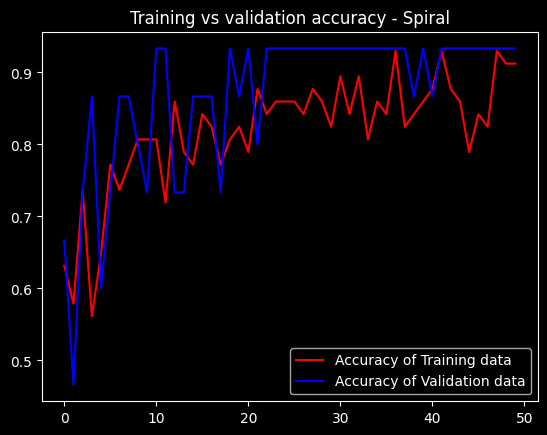

<Figure size 640x480 with 0 Axes>

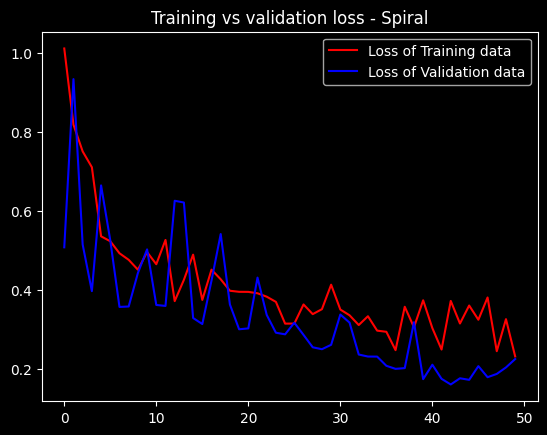

<Figure size 640x480 with 0 Axes>

In [155]:
get_acc3 = his3.history['accuracy']
value_acc3 = his3.history['val_accuracy']
get_loss3 = his3.history['loss']
validation_loss3 = his3.history['val_loss']

epochs3 = range(len(get_acc3))
plt.plot(epochs3, get_acc3, 'r', label='Accuracy of Training data')
plt.plot(epochs3, value_acc3, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy - Spiral')
plt.legend(loc=0)
plt.figure()
plt.show()

epochs3 = range(len(get_loss3))
plt.plot(epochs3, get_loss3, 'r', label='Loss of Training data')
plt.plot(epochs3, validation_loss3, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss - Spiral')
plt.legend(loc=0)
plt.figure()
plt.show()

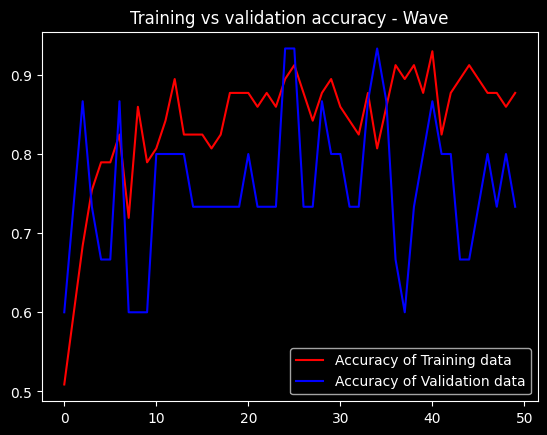

<Figure size 640x480 with 0 Axes>

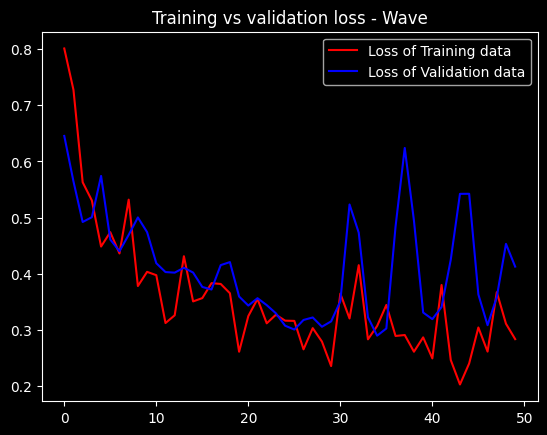

<Figure size 640x480 with 0 Axes>

In [156]:
get_acc4 = his4.history['accuracy']
value_acc4 = his4.history['val_accuracy']
get_loss4 = his4.history['loss']
validation_loss4 = his4.history['val_loss']

epochs4 = range(len(get_acc4))
plt.plot(epochs4, get_acc4, 'r', label='Accuracy of Training data')
plt.plot(epochs4, value_acc4, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy - Wave')
plt.legend(loc=0)
plt.figure()
plt.show()

epochs4 = range(len(get_loss4))
plt.plot(epochs4, get_loss4, 'r', label='Loss of Training data')
plt.plot(epochs4, validation_loss4, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss - Wave')
plt.legend(loc=0)
plt.figure()
plt.show()

# **MODEL PREDICTION**

**TEST PREDICTION 1**

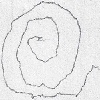

In [157]:
load_img("/content/drive/MyDrive/parkinsons-drawings/spiral/testing/parkinson/V03PE07.png",target_size=(100,100))

In [158]:
image=load_img("/content/drive/MyDrive/parkinsons-drawings/spiral/testing/parkinson/V03PE07.png",target_size=(100,100))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image=np.expand_dims(image, axis=0)

prediction=model3.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("The Model pridiction for the Test Image is:{}.".format(move_name))

1/1 [==============================] - 0s 88ms/step
The Model pridiction for the Test Image is:parkinson.


**TEST PREDICTION 2**

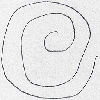

In [159]:
load_img("/content/drive/MyDrive/parkinsons-drawings/spiral/testing/healthy/V01HE01.png",target_size=(100,100))

In [160]:
image2=load_img("/content/drive/MyDrive/parkinsons-drawings/spiral/testing/healthy/V01HE01.png",target_size=(100,100))

image2=img_to_array(image2) 
image2=image2/255.0
prediction_image2=np.array(image2)
prediction_image2=np.expand_dims(image2, axis=0)

prediction2=model4.predict(prediction_image2)
value2=np.argmax(prediction2)
move_name2=mapper(value2)
print("Prediction is {}.".format(move_name2))

1/1 [==============================] - 3s 3s/step
Prediction is healthy.


In [161]:
print(test_sp.shape)
prediction_sp=model3.predict(test_sp)
print(prediction_sp.shape)

PRED_sp=[]
for item in prediction_sp:
    value_sp=np.argmax(item)      
    PRED_sp+=[value_sp]
    
ANS_sp=tlabels_sp0
accuracy_sp=accuracy_score(ANS_sp,PRED_sp)
print(accuracy_sp)    


(30, 100, 100, 3)
1/1 [==============================] - 1s 1s/step
(30, 2)
0.8


In [162]:
print(test_wv.shape)
prediction_wv=model4.predict(test_wv)
print(prediction_wv.shape)

PRED_wv=[]
for item in prediction_wv:
    value_wv=np.argmax(item)      
    PRED_wv+=[value_wv]
    
ANS_wv=tlabels_wv0
accuracy_wv=accuracy_score(ANS_wv,PRED_wv)
print(accuracy_wv) 

(30, 100, 100, 3)
1/1 [==============================] - 1s 1s/step
(30, 2)
0.2
